<center>
    <h1>Coursera - Applied Data Science Capstone</h1>
    <h2>Peer-graded Assignment: Segmenting and Clustering Neighborhoods in Toronto</h2>
</center>

***

## Table of Contents



1.<a href="#item1">Requirement #1: Fetching Canada Postal Codes and preparing the DataFrame</a>

2.<a href="#item2">Requirement #2: Complementing the Longitude and Latitude infiormation for the different Postal Codes (using Geocoder and Provided GeoLocation Lookup CSV File)</a>

3.<a href="#item3">Requirement #3: Plotting the Postal Codes on a map</a>



***

## <a id='item1'>Requirements #1</a>

### - Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:


In [1]:
# library for data analysis
import pandas as pd 

# library to handle requests
import requests 

# library to parse HTML documents
from bs4 import BeautifulSoup 

In [2]:
# get the response in the form of html
wikiurl=" https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
table_class="wikitable sortable"
response=requests.get(wikiurl)
print("HTTP Status Code: " + str(response.status_code))
# print(response.text)

HTTP Status Code: 200


In [3]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
codestable=soup.find('table',{'class':table_class})
# print(codestable)

### - convert table into  dataframe. The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood

In [4]:
df_codes=pd.read_html(str(codestable))

df_codes=pd.DataFrame(df_codes[0])

print(df_codes.head(10))

  Postal Code           Borough                                Neighbourhood
0         M1A      Not assigned                                 Not assigned
1         M2A      Not assigned                                 Not assigned
2         M3A        North York                                    Parkwoods
3         M4A        North York                             Victoria Village
4         M5A  Downtown Toronto                    Regent Park, Harbourfront
5         M6A        North York             Lawrence Manor, Lawrence Heights
6         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government
7         M8A      Not assigned                                 Not assigned
8         M9A         Etobicoke      Islington Avenue, Humber Valley Village
9         M1B       Scarborough                               Malvern, Rouge


In [5]:
# The code was removed by Watson Studio for sharing.

In [6]:
# Save Codes Dataframe into a CSV file for debugging 
from project_lib import Project

project = Project(project_id=project_id, project_access_token=project_token)
pc = project.project_context
project.save_data(data=df_codes.to_csv(index=False),file_name='canada_codes.csv',overwrite=True)

{'file_name': 'canada_codes.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'courseracapstoneproject-donotdelete-pr-hus2xobrw8txte',
 'asset_id': '7987bb01-6db2-408b-9216-6a1367561b65'}

### - Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

In [7]:
df_codes = df_codes[df_codes["Borough"] != 'Not assigned']

### - More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.

In [8]:
# Data table from Wikipedia is already grouped/aggregated

### - If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

In [9]:
for index, row in df_codes.iterrows():
    neighbourhood = row['Neighbourhood']
    borough = row['Borough']
    # print(str(index) + "|" + neighbourhood + "|" + borough)
    if (str(neighbourhood).find('Not assigned') != -1 ): 
        df_codes['Neighbourhood'][index] = df_codes[index]['Borough']

df_codes = df_codes.reset_index(drop=True)
df_codes.head(11)

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


### - Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.

### - In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

In [10]:
# df_codes dimentions
df_codes.shape

(103, 3)

***

## <a id='item2'>Requrements # 2</a>


### - Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

### - In an older version of this course, we were leveraging the Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood. However, recently Google started charging for their API: http://geoawesomeness.com/developers-up-in-arms-over-google-maps-api-insane-price-hike/, so we will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html.

### - The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. Taking postal code M5G as an example, your code would look something like this:

In [11]:
# Installing Geocoder
!pip install geocoder

In [12]:
# import numpy as np # library to handle data in a vectorized manner

# import pandas as pd # library for data analsysis
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# import json # library to handle JSON files

# #!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
# from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# import requests # library to handle requests
# from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# # Matplotlib and associated plotting modules
# import matplotlib.cm as cm
# import matplotlib.colors as colors

# # import k-means from clustering stage
# from sklearn.cluster import KMeans

# #!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
# import folium # map rendering library

# print('Libraries imported.')

In [13]:
# Add the Longitude and Latitude columns  
df_codes['Longitude'] = 0.0
df_codes['Latitude'] = 0.0

df_codes.head()

,Postal Code,Borough,Neighbourhood,Longitude,Latitude
0,M3A,North York,Parkwoods,0.0,0.0
1,M4A,North York,Victoria Village,0.0,0.0
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",0.0,0.0
3,M6A,North York,"Lawrence Manor, Lawrence Heights",0.0,0.0
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",0.0,0.0


In [14]:
# Load the geolocation data CSV file to use when no location is found from the GeoCoder
geo_lookup = pd.read_csv("http://cocl.us/Geospatial_data")
geo_lookup.head()
geo_lookup['Longitude'] = geo_lookup['Longitude'].astype(float)
geo_lookup['Latitude'] = geo_lookup['Latitude'].astype(float)
geo_lookup.set_index('Postal Code')
geo_lookup.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [15]:
geo_lookup.shape

(103, 3)

### - Complementing the Longitude and Latitude information 
### - Attempting to fetch the Geo Loction Location information using the Geocoder APIs, and then reverting to the GeoLocation Lookup data when the API fails

In [16]:
# import geocoder
import geocoder
from geopy.geocoders import Nominatim
base_address = 'Canada'
geolocator = Nominatim(user_agent="canada_explorer")
location = geolocator.geocode(base_address)
ca_latitude = location.latitude
ca_longitude = location.longitude
print('The geograpical coordinate of Canada are {}, {}.'.format(ca_latitude, ca_longitude))

latitude = 0.0
longitude = 0.0

for index, row in df_codes.iterrows():
    neighbourhood = row['Neighbourhood']
    borough = row['Borough']
    postal_code = row['Postal Code']
    address =  postal_code  + ', ' + base_address #+ ',' + borough
    location = geolocator.geocode(address)
    if(location is not None):
        latitude = location.latitude
        longitude = location.longitude
#         print('Geolocation Found {} Long/Lat {}/{}'.format(address, longitude, latitude))
    else:
        df = geo_lookup[geo_lookup['Postal Code'].isin([postal_code])]
        if (df is not None):
            longitude = df['Longitude'].iloc[0]
            latitude =df['Latitude'].iloc[0]
#             print('Found {} Long/Lat {}/{} using Location Lookup table'.format(address, longitude, latitude))
    df_codes['Longitude'][index] = float(longitude)
    df_codes['Latitude'][index] = float(latitude)
    longitude = 0.0
    latitude = 0.0


The geograpical coordinate of Canada are 61.0666922, -107.9917071.


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [17]:
df_codes.head()

,Postal Code,Borough,Neighbourhood,Longitude,Latitude
0,M3A,North York,Parkwoods,-78.506920,-0.205540
1,M4A,North York,Victoria Village,-79.315572,43.725882
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",-79.360636,43.654260
3,M6A,North York,"Lawrence Manor, Lawrence Heights",-79.464763,43.718518
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",-78.506920,-0.205540


***

## <a id='item3'>Requirement #3</a>

### - to generate maps to visualize your neighborhoods and how they cluster together.

### - The First maps below is generated from the Wiki table and the attempt to lookup the Geo Location information using the APIs (reverting to the Postal Code location lookup when the API fails)
### - The second map is for the locations listed in the GeoLocation Lookup file. (only form comparison)
### - The GeoLocation APIs were unreliable, failed to retreive the Lon/Lat about 77% of the times.

In [21]:
# map rendering library
import folium 

# create map of New York using latitude and longitude values
map_canada = folium.Map(location=[geo_lookup['Latitude'][1], geo_lookup['Longitude'][1]], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_codes['Latitude'], df_codes['Longitude'], df_codes['Borough'], df_codes['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_canada)  
    
map_canada

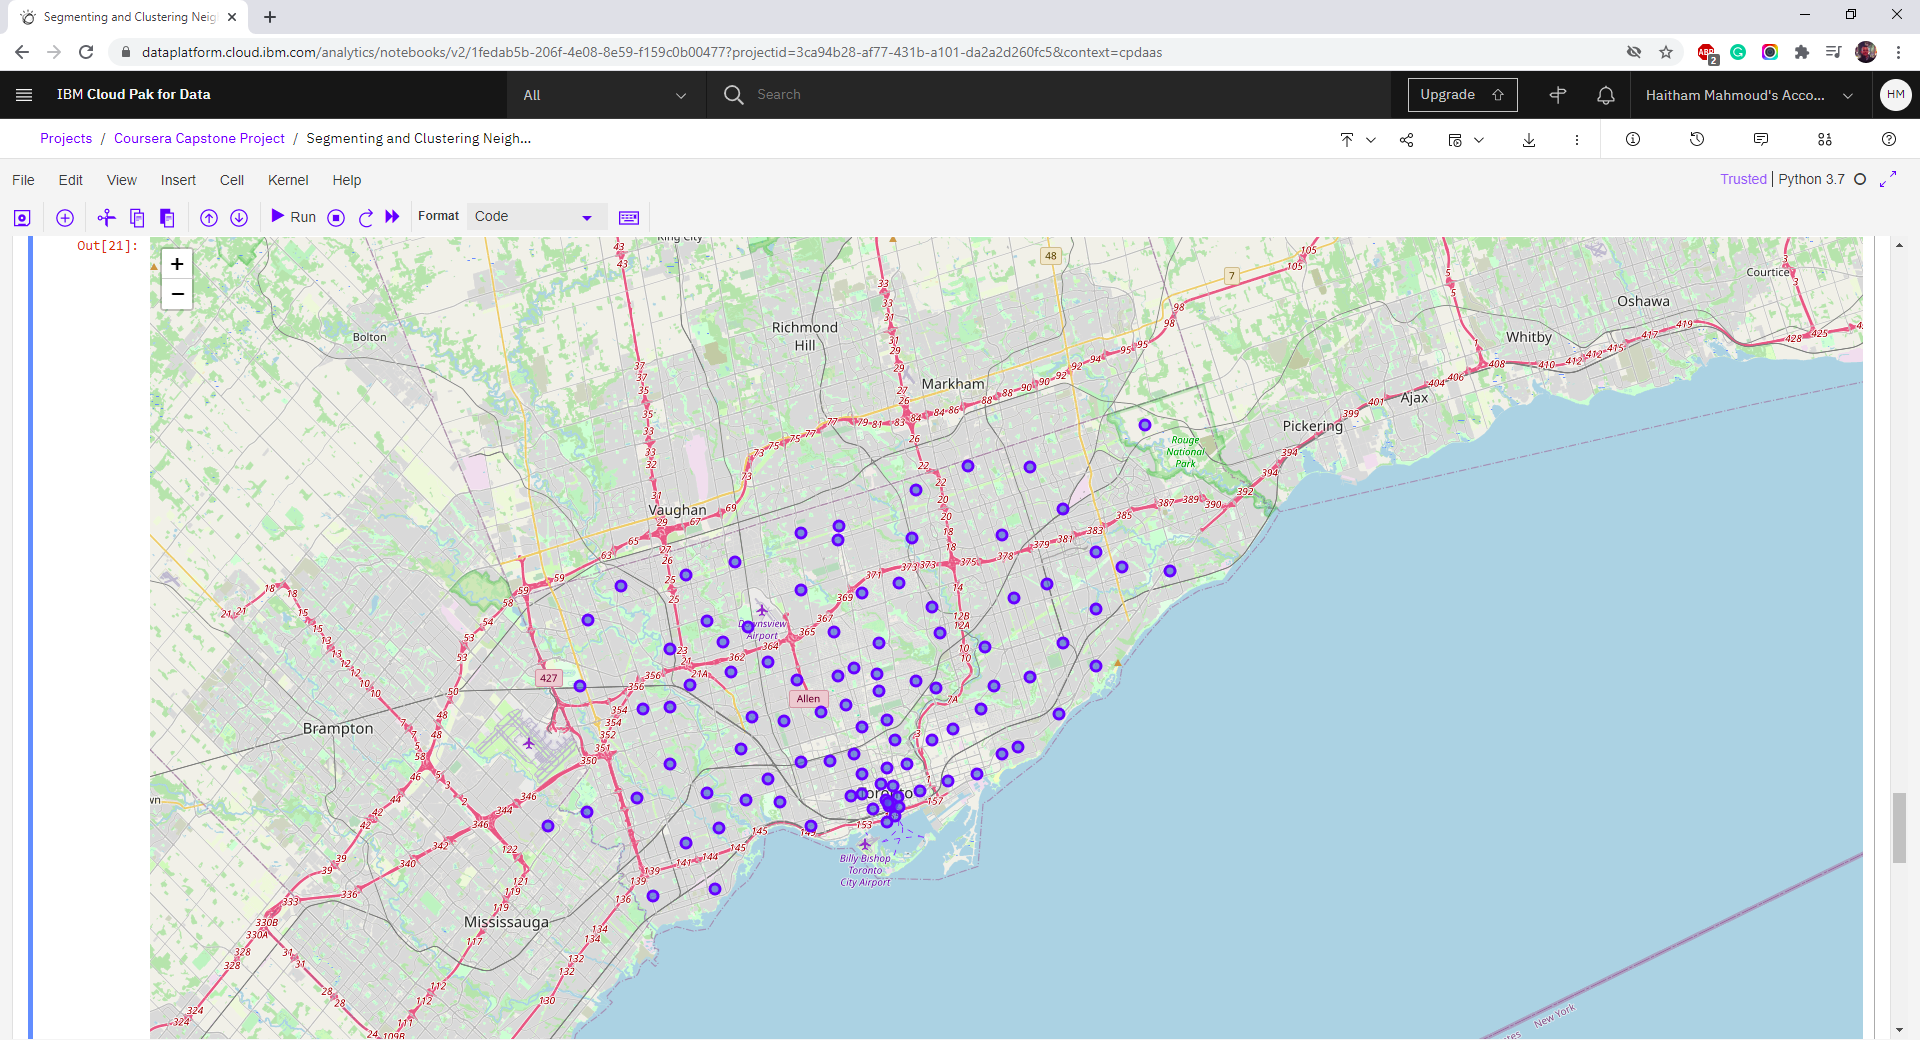

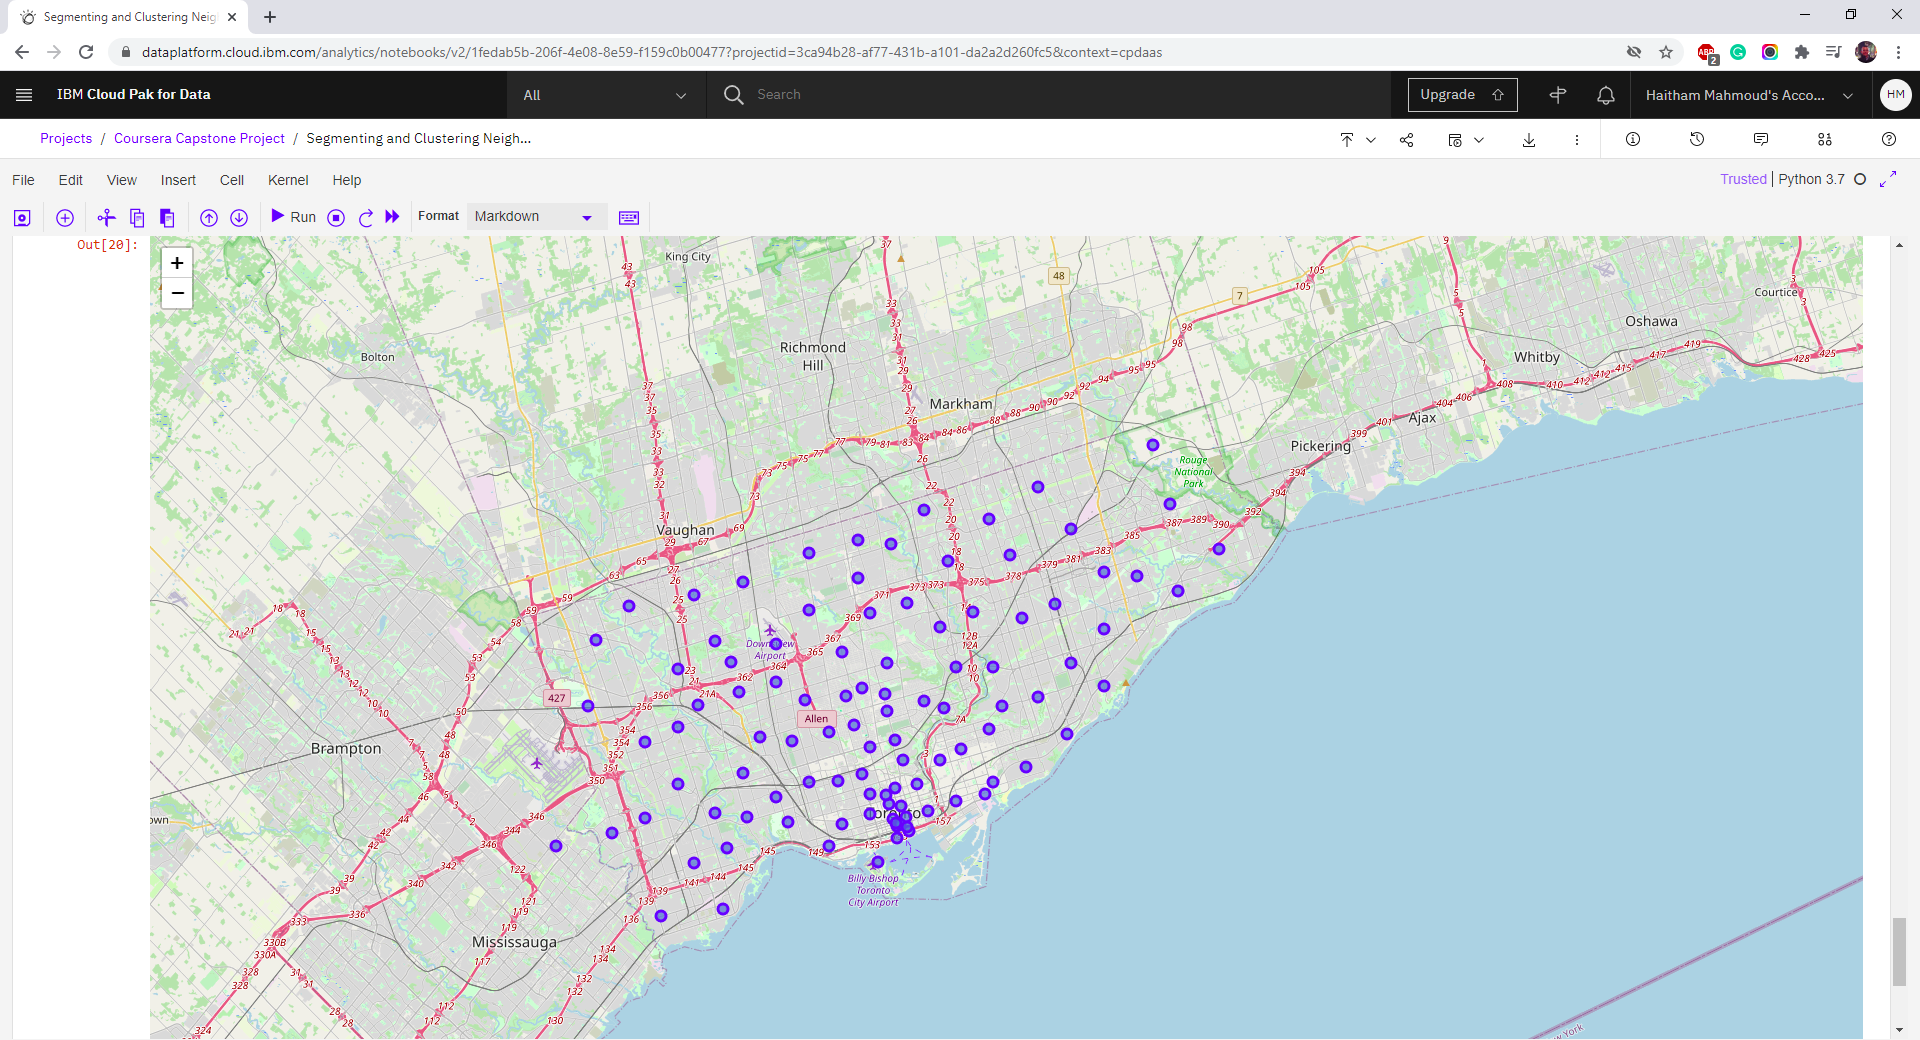

### - Similar map using the Postal Codes Lookup file (for comparision with the Wiki Data) 

In [20]:
map_canada = folium.Map(location=[geo_lookup['Latitude'][1], geo_lookup['Longitude'][1]], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(geo_lookup['Latitude'], geo_lookup['Longitude'], geo_lookup['Postal Code'], geo_lookup['Postal Code']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_canada)  
    
map_canada